In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/data.csv')

df = df.drop(['id', 'Unnamed: 32'], axis=1)

df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Test different values of k
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    # Initialize k-NN with Manhattan distance (p=1)
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the best k value
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]

print(f"Best k value: {best_k}")


Best k value: 9


In [4]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[70  1]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Confusion Matrix:


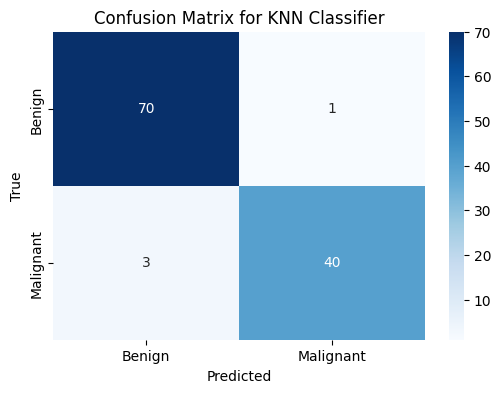

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

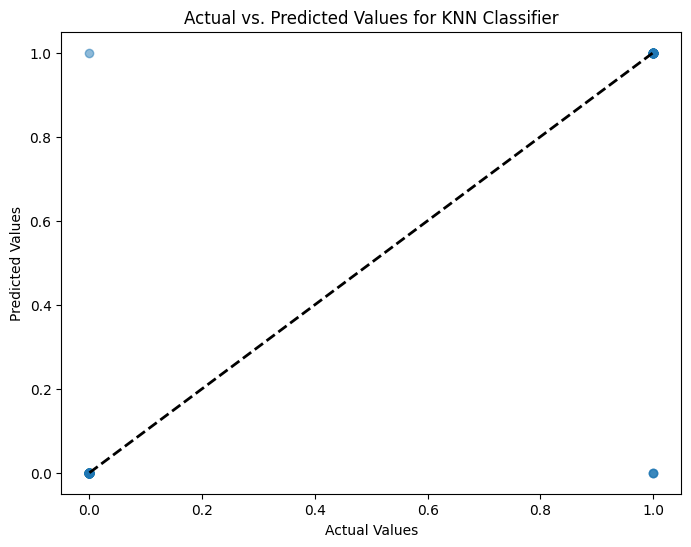

In [18]:
# Plot for KNN graph of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for KNN Classifier')
plt.show()


In [19]:
#printing the mse and r^2 value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 0.03508771929824561
R-squared (R^2): 0.8506387160170324
